<a href="https://colab.research.google.com/github/cfcastillo/DS-6-Notebooks/blob/main/Education_Capstone_MS5_Visualizations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Definition

The purpose of this project is to identify what factors influence people to choose certain professions or trades. In understanding these factors, we can help colleges like Central New Mexico College (CNM) offer courses that support those professions and better target their marketing to people who are likely to choose those professions.

This project will be a supervised categorization problem using tree-based models to identify the factors that will contribute to career choice.

**TODO: Start with 2019 and then, if time, see how covid has affected numbers in 2020 and 2021.**

**TODO: If time, parse 2018 and prior to compare years**



# Data Identification Process

Steps:

1. We stated several questions we wanted answered (target). 
1. After defining our problem, we listed sets of variables that we believed could answer our questions. We then put the variables and targets into a [spreadsheet](https://docs.google.com/spreadsheets/d/1bOhOBHKOae9TDN9n9-xF7ag4QW_Z0c7HXTYLXeMMLHs/edit#gid=0) to define the dataset we would need to run our analysis. 
1. We then researched data sources such as Bureau of Labor Statistics and the US Census to locate data that supported our research. 
1. We then mapped the columns in the data sources to the columns in our desired dataset and linked multiple datasets by target code value.

*Note: The data identification process is still a work in progress. As we proceed with EDA, we will discover some columns are not needed and others are needed. As we analyzed the data during the data cleaning process, we discovered that earnings are complex, often made up of multiple jobs. Additional analysis will be needed to solidify our predictor when applying the model.*

# Data Collection

The following data sources were used for this project. Data was imported into Google Drive from the below links and modified as needed to support this project.

The primary datasets for this project were initially taken from the Census' [Annual Social and Economic Supplement (ASEC)](https://www.census.gov/programs-surveys/saipe/guidance/model-input-data/cpsasec.html) of the Current Population Survey (CPS) for 2020. However, because 2020 was anomalous due to Covid, we chose to go back and take data from 2019 - pre-covid to get occupation and salary information that was more stable. Per the above link, the "*ASEC data is the source of timely official national estimates of poverty levels and rates and of widely used measures of income. It provides annual estimates based on a survey of more than 75,000 households. The survey contains detailed questions covering social and economic characteristics of each person who is a household member as of the interview date. Income questions refer to income received during the previous calendar year.*"

[Annual Social and Economic Survey (ASEC) All Years Data](https://www.census.gov/data/datasets/time-series/demo/cps/cps-asec.html)

* Contains links to all years from 2010 to 2021. CSV format available from 2019 to 2021. Prior to 2019, a fixed format file is provided so columns would need to be parsed using the available data dictionary.
* [2021 Survey - csv](https://www.census.gov/data/datasets/time-series/demo/cps/cps-asec.2021.html)
* [2020 Survey - csv](https://www.census.gov/data/datasets/time-series/demo/cps/cps-asec.2020.html)
* [2019 Survey - csv](https://www.census.gov/data/datasets/time-series/demo/cps/cps-asec.2019.html)
* [2018 Survey - dat](https://www.census.gov/data/datasets/time-series/demo/cps/cps-asec.2018.html) - Need to convert to csv

[Quarterly Census of Employment and Wages](https://www.bls.gov/cew/about-data/)

* Source data for OES Statistics. Can be used if detailed data is needed.

[Occupational Employment Wage Statistics (OES) Data](https://data.bls.gov/oes/#/geoOcc/Multiple%20occupations%20for%20one%20geographical%20area)

* Format - Excel converted to CSV
* Contains Occupational codes and aggregated statistics on wages for those occupations.

[FIPS State Codes](https://www.census.gov/library/reference/code-lists/ansi/ansi-codes-for-states.html)

* Format - Copied from PDF and converted to CSV
* Contains FIPS State codes mapped to US Postal Service (USPS) State codes.

[Census Occupation Codes](https://www2.census.gov/programs-surveys/cps/techdocs/cpsmar20.pdf)

* Format - Copied from PDF and converted to CSV
* Contains Census Occupation codes mapped to Federal Standard Occupational Classification (SOC) Codes.

[Bureau of Labor Statistics SOC Codes](https://www.bls.gov/oes/current/oes_stru.htm#15-0000)

* Format - list on website

[Potential CNM Enrollment Data](https://www.cnm.edu/depts/finance-operations/ods/institutional-research-request)


## CNM Data Links

[KPIs PDF](https://www.cnm.edu/depts/finance-operations/ods/dashboards-kpis/kpiupdate1120.pdf)

[CNM Data Dashboard](https://livecnm.sharepoint.com/sites/insights/FO/ODS/CNMdashboards/SitePages/Home.aspx?e=1%3Aa3207ba35cac40c480e6029dc0bfcc2c)

[CNM Graduate Outcomes](https://www.cnm.edu/depts/finance-operations/ods/documents/graduate-surveys/2018-2019-graduate-outcomes.pdf)

## Summarized Data Dictionary

[Here is a link to a summarized data dictionary.](https://docs.google.com/document/d/1io7TtqebJLtw6FKE7zkbUh26QkG3rEJrZX3Fver9zmU/edit)


# Imports

In [ ]:
# grab the imports needed for the project
import pandas as pd
import glob
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import statsmodels.api as sm

# all
from sklearn import datasets
from sklearn import metrics
from sklearn import preprocessing
from sklearn import datasets, neighbors
from sklearn.metrics import classification_report
from sklearn.neighbors import NearestNeighbors
import sklearn.model_selection as model_selection
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from mlxtend.plotting import plot_decision_regions

# Regression
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor 
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn import metrics  

# Visualization
import graphviz
from IPython.display import display
from sklearn import tree
import plotly.express as px
from ipywidgets import interact

# Globals
The team had different data links. The global here is to allow team members to specify who is working on this notebook so that they can run the code in their environment.

In [ ]:
# Expected values are: ellie, amy, cecilia - lowercase
team_member = 'ellie'

# Root drive path
if team_member in ['amy','ellie']:
  root_drive = '/content/drive/MyDrive/'
else: # Cecilia
  root_drive = '/content/drive/MyDrive/Student Folder - Cecilia/Projects/'

# Data Cleaning

Once we identified the data elements needed for our project and the data sources that provided those data elements, the following steps were taken to get the data into a format needed for our analysis.

1. Downloaded data from data sources and placed copies in Google Drive.
1. Made changes to raw data where needed to support the project. 
  * Added State code to OES data and remove headers and footers from the data.
  * Created lookup data for State codes and SOC codes so secondary data sources could be merged with primary Census data. This involved cleaning the census code list so it could be properly parsed.
1. Converted codes in secondary datasets into Census codes.
1. Merged all datasets together into a single dataset.
1. Removed data that did not meet criteria for our analysis
  * Removed anyone under age 16.
  * Imputed null values.
1. Studied earnings/salary columns to determine which columns provided values that could be used for modeling. Added in columns that were missing from the initial analysis.
1. We were not able to reliably match the OES data to the census data using the full SOC Code because of disparities in SOC Codes. Therefore, we executed 3 matching passes reducing the SOC code by one character each time and pulling the largest Census code for the SOC code prefix. This allowed us to match XX % of the data.

TODO: REFINE AS PROJECT PROGRESSES.

## Import Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Import Census data
asec_year = '14'
data_year = int('20' + asec_year)
asec_path = root_drive + 'Capstone/Data/ASEC/asecpub' + asec_year + 'csv/'
asec_data_person = pd.read_csv(asec_path + 'pppub' + asec_year + '.csv')
asec_data_household = pd.read_csv(asec_path + 'hhpub' + asec_year + '.csv')
asec_data_family = pd.read_csv(asec_path + 'ffpub' + asec_year + '.csv')

# ELLIE

# Import FIPS state codes so we can convert USPS state to FIPS state to match back to Census data.
fips_state_codes = pd.read_csv(codes_path + 'FIPS_STATE_CODES.csv')


In [ ]:
# How many columns and rows do we have in each dataset?
print(f'Person data: {asec_data_person.shape}')
print(f'Household data: {asec_data_household.shape}')
print(f'Family data: {asec_data_family.shape}')

Person data: (199556, 26)
Household data: (97926, 14)
Family data: (86224, 24)


## ASEC Data

### Define ASEC Columns

The following data dictionary provides details for the selected columns.

[ASEC Appendices](https://www2.census.gov/programs-surveys/cps/techdocs/cpsmar19.pdf)

[ASEC Data Dictionary](https://www2.census.gov/programs-surveys/cps/datasets/2019/march/06_ASEC_2019-Data_Dictionary_Full.pdf)


In [ ]:
# Get lists of columns for various datasets that will be used for the project
# Note: Columns can be added as needed here and will propagate through the project.
hid_col = ['H_IDNUM']
hseq_col = ['H_SEQ']
fseq_col = ['FH_SEQ']  # Joins to household data through H_SEQ
year_col = ['DATA_YEAR']
person_cols = ['OCCUP','A_MJOCC','A_DTOCC','AGE1','A_SEX','PRDTRACE','PXRACE1','PRCITSHP',
               'A_HGA','PRERELG', 'A_GRSWK', 'HRCHECK','HRSWK','PEARNVAL','A_CLSWKR','WEIND',
               'A_MARITL','A_HSCOL','A_WKSTAT','HEA','PEINUSYR']

# In 2022 data? - A_MAJACT, PURACEOT, RAC_HISP, UED_TYP

household_cols = ['GTMETSTA','GEDIV','GESTFIPS','HHINC','H_TENURE','H_LIVQRT']

# In 2022 data? - FEARNS, GEUR
# FKINDEX, 'FINC_ANN', 'FINC_DST', 'FINC_PEN' not in 2018 and earlier

family_cols = ['FINC_FR','FINC_SE','FINC_WS','FINC_CSP','FINC_DIS','FINC_DIV','FINC_RNT',
               'FINC_ED','FINC_SS','FINC_SSI','FINC_FIN','FINC_SUR','FINC_INT','FINC_UC',
               'FINC_OI','FINC_VET','FINC_PAW','FINC_WC']

### Get Household Id

In [ ]:
# Extract the Household id number from the person record so we can join the household and person dataframes by this id.
asec_data_person[hid_col] = asec_data_person['PERIDNUM'].str[:20]

In [ ]:
# View Person Data
asec_data_person[hid_col + person_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199556 entries, 0 to 199555
Data columns (total 22 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   H_IDNUM   199556 non-null  object
 1   OCCUP     199556 non-null  int64 
 2   A_MJOCC   199556 non-null  int64 
 3   A_DTOCC   199556 non-null  int64 
 4   AGE1      199556 non-null  int64 
 5   A_SEX     199556 non-null  int64 
 6   PRDTRACE  199556 non-null  int64 
 7   PXRACE1   199556 non-null  int64 
 8   PRCITSHP  199556 non-null  int64 
 9   A_HGA     199556 non-null  int64 
 10  PRERELG   199556 non-null  int64 
 11  A_GRSWK   199556 non-null  int64 
 12  HRCHECK   199556 non-null  int64 
 13  HRSWK     199556 non-null  int64 
 14  PEARNVAL  199556 non-null  int64 
 15  A_CLSWKR  199556 non-null  int64 
 16  WEIND     199556 non-null  int64 
 17  A_MARITL  199556 non-null  int64 
 18  A_HSCOL   199556 non-null  int64 
 19  A_WKSTAT  199556 non-null  int64 
 20  HEA       199556 non-null 

In [ ]:
# Look at first 5 records of selected columns of person data.
asec_data_person[hid_col + person_cols].head()

,H_IDNUM,OCCUP,A_MJOCC,A_DTOCC,AGE1,A_SEX,PRDTRACE,PXRACE1,PRCITSHP,A_HGA,PRERELG,A_GRSWK,HRCHECK,HRSWK,PEARNVAL,A_CLSWKR,WEIND,A_MARITL,A_HSCOL,A_WKSTAT,HEA,PEINUSYR
0,99365983058620193001,913,10,22,10,1,1,0,1,40,0,0,2,60,3250,1,8,1,0,2,3,0
1,99365983058620193001,0,0,0,9,2,2,0,1,40,0,0,0,0,0,0,23,1,0,1,4,0
2,69602397022455093001,0,0,0,17,2,1,0,1,39,0,0,0,0,0,0,23,1,0,1,5,0
3,69602397022455093001,0,0,0,17,1,1,0,1,39,0,0,0,0,0,0,23,1,0,1,5,0
4,07093206692896491001,724,8,20,12,1,1,0,1,40,0,0,1,30,1500,6,20,1,0,2,4,0


In [ ]:
asec_data_person[hid_col + person_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199556 entries, 0 to 199555
Data columns (total 22 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   H_IDNUM   199556 non-null  object
 1   OCCUP     199556 non-null  int64 
 2   A_MJOCC   199556 non-null  int64 
 3   A_DTOCC   199556 non-null  int64 
 4   AGE1      199556 non-null  int64 
 5   A_SEX     199556 non-null  int64 
 6   PRDTRACE  199556 non-null  int64 
 7   PXRACE1   199556 non-null  int64 
 8   PRCITSHP  199556 non-null  int64 
 9   A_HGA     199556 non-null  int64 
 10  PRERELG   199556 non-null  int64 
 11  A_GRSWK   199556 non-null  int64 
 12  HRCHECK   199556 non-null  int64 
 13  HRSWK     199556 non-null  int64 
 14  PEARNVAL  199556 non-null  int64 
 15  A_CLSWKR  199556 non-null  int64 
 16  WEIND     199556 non-null  int64 
 17  A_MARITL  199556 non-null  int64 
 18  A_HSCOL   199556 non-null  int64 
 19  A_WKSTAT  199556 non-null  int64 
 20  HEA       199556 non-null 

In [ ]:
# Convert hidnum to object with left fill zero. necessary for years 2018 and prior
if int(asec_year) <= 18:
  asec_data_household[hid_col[0]] = asec_data_household[hid_col[0]].astype(str).str.zfill(20)

In [ ]:
# View Household Data
asec_data_household[hid_col + hseq_col + household_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97926 entries, 0 to 97925
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   H_IDNUM   97926 non-null  object
 1   H_SEQ     97926 non-null  int64 
 2   GTMETSTA  97926 non-null  int64 
 3   GEDIV     97926 non-null  int64 
 4   GESTFIPS  97926 non-null  int64 
 5   HHINC     97926 non-null  int64 
 6   H_TENURE  97926 non-null  int64 
 7   H_LIVQRT  97926 non-null  int64 
dtypes: int64(7), object(1)
memory usage: 6.0+ MB


In [ ]:
# Look at first 5 records of household data
asec_data_household[hid_col + hseq_col + household_cols].head()

,H_IDNUM,H_SEQ,GTMETSTA,GEDIV,GESTFIPS,HHINC,H_TENURE,H_LIVQRT
0,99365983058620193001,3,2,0,23,14,1,1
1,69602397022455093001,4,2,0,23,7,1,1
2,07093206692896491001,6,2,0,23,13,1,1
3,52093506602279493001,7,2,0,23,14,1,1
4,26499290103036993001,9,2,0,23,0,0,1


In [ ]:
# View family data. Get record count before grouping data.
asec_data_family[fseq_col + family_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86224 entries, 0 to 86223
Data columns (total 19 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   FH_SEQ    86224 non-null  int64
 1   FINC_FR   86224 non-null  int64
 2   FINC_SE   86224 non-null  int64
 3   FINC_WS   86224 non-null  int64
 4   FINC_CSP  86224 non-null  int64
 5   FINC_DIS  86224 non-null  int64
 6   FINC_DIV  86224 non-null  int64
 7   FINC_RNT  86224 non-null  int64
 8   FINC_ED   86224 non-null  int64
 9   FINC_SS   86224 non-null  int64
 10  FINC_SSI  86224 non-null  int64
 11  FINC_FIN  86224 non-null  int64
 12  FINC_SUR  86224 non-null  int64
 13  FINC_INT  86224 non-null  int64
 14  FINC_UC   86224 non-null  int64
 15  FINC_OI   86224 non-null  int64
 16  FINC_VET  86224 non-null  int64
 17  FINC_PAW  86224 non-null  int64
 18  FINC_WC   86224 non-null  int64
dtypes: int64(19)
memory usage: 12.5 MB


In [ ]:
# There may be multiple families per household. We need unique records in order to merge
# with the household data.
asec_data_family_unique = asec_data_family.drop_duplicates(fseq_col + family_cols)[fseq_col + family_cols]

In [ ]:
# View family data after grouping. Get record count with all columns. 
# Compare with record count from sequence number column to ensure we truly have unique rows 
# and to see if further grouping is needed.
asec_data_family_unique

,FH_SEQ,FINC_FR,FINC_SE,FINC_WS,FINC_CSP,FINC_DIS,FINC_DIV,FINC_RNT,FINC_ED,FINC_SS,FINC_SSI,FINC_FIN,FINC_SUR,FINC_INT,FINC_UC,FINC_OI,FINC_VET,FINC_PAW,FINC_WC
0,3,2,2,1,2,2,2,2,2,2,2,2,2,1,2,2,2,2,2
1,4,2,2,2,2,2,2,2,2,1,2,2,2,2,2,2,2,2,2
2,6,2,1,1,2,2,2,2,2,2,2,2,2,1,2,2,2,2,2
3,7,2,2,1,1,2,2,2,2,2,2,2,2,1,2,1,2,2,2
4,15,2,1,1,2,2,2,1,2,2,2,2,2,1,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86218,97650,2,2,1,2,2,2,2,2,2,2,2,2,2,2,2,2,1,2
86219,97650,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
86221,97651,2,2,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
86222,97651,2,2,1,2,2,2,2,2,2,2,2,2,2,1,2,2,2,2


In [ ]:
# Looking at the unique results indicates that we still do not have a single family record per household
# because families within the household may have different income sources. Therefore, we will take the 
# first family record assuming it is the most significant record. If extending this project in future, 
# a better mechanism for reducing the data would be required.
temp_family = asec_data_family[asec_data_family['FFPOS'] == 1]
asec_data_family_single = temp_family[fseq_col + family_cols]

In [ ]:
temp_family.tail(50)

,Unnamed: 0,Unnamed: 0.1,REC_TYPE,FH_SEQ,FFPOS,FINC_FR,FINC_SE,FINC_WS,FINC_CSP,FINC_DIS,FINC_DIV,FINC_RNT,FINC_ED,FINC_SS,FINC_SSI,FINC_FIN,FINC_SUR,FINC_INT,FINC_UC,FINC_OI,FINC_VET,FINC_PAW,FINC_WC,DATA_YEAR
86157,86157,267136,2,97600,1,2,2,1,1,2,2,2,2,1,2,2,2,2,2,2,2,2,2,2014
86159,86159,267142,2,97602,1,2,2,1,2,2,1,2,2,2,2,2,2,1,2,2,2,2,2,2014
86160,86160,267145,2,97603,1,2,2,1,2,2,1,2,2,1,2,2,2,1,2,2,2,2,2,2014
86161,86161,267149,2,97605,1,2,2,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2014
86162,86162,267154,2,97606,1,2,2,1,2,2,2,2,2,1,2,2,2,1,2,2,2,2,2,2014
86163,86163,267160,2,97607,1,2,2,1,2,2,2,2,2,1,2,2,2,1,2,2,2,2,2,2014
86164,86164,267169,2,97608,1,2,2,1,2,2,2,2,2,2,2,2,2,1,2,2,2,2,2,2014
86166,86166,267178,2,97609,1,2,2,1,2,2,2,2,2,2,2,2,2,1,2,2,2,2,2,2014
86169,86169,267188,2,97610,1,2,2,2,2,2,2,2,2,1,2,2,2,2,2,2,1,2,2,2014
86170,86170,267193,2,97611,1,2,2,2,2,2,2,2,2,1,1,2,2,2,2,2,2,2,2,2014


In [ ]:
# TODO CFC: will redo above functionality so that if any family in the household has a 1 for an income source, we port over a 1.
# Can do this by picking the min() value for each column and grouping on FH_SEQ

In [ ]:
# View results
asec_data_family_single

,FH_SEQ,FINC_FR,FINC_SE,FINC_WS,FINC_CSP,FINC_DIS,FINC_DIV,FINC_RNT,FINC_ED,FINC_SS,FINC_SSI,FINC_FIN,FINC_SUR,FINC_INT,FINC_UC,FINC_OI,FINC_VET,FINC_PAW,FINC_WC
0,3,2,2,1,2,2,2,2,2,2,2,2,2,1,2,2,2,2,2
1,4,2,2,2,2,2,2,2,2,1,2,2,2,2,2,2,2,2,2
2,6,2,1,1,2,2,2,2,2,2,2,2,2,1,2,2,2,2,2
3,7,2,2,1,1,2,2,2,2,2,2,2,2,1,2,1,2,2,2
4,15,2,1,1,2,2,2,1,2,2,2,2,2,1,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86214,97647,2,2,1,2,2,2,2,2,1,2,2,2,2,2,2,1,2,2
86215,97648,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,2,2
86216,97649,2,2,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
86218,97650,2,2,1,2,2,2,2,2,2,2,2,2,2,2,2,2,1,2


### Merge ASEC Tables

In [ ]:
# Join Household and Personal records into single dataframe
# Inner join - should not have person without household.
asec_combined = pd.merge(asec_data_household[hid_col + hseq_col + household_cols], asec_data_person[hid_col + person_cols], on=hid_col)

# Join Family to get FINC columns
asec_combined = pd.merge(asec_combined, asec_data_family_single[fseq_col + family_cols], left_on=hseq_col, right_on=fseq_col, how='left')

# Add data year so that we can do trend analysis
asec_combined[year_col] = data_year

In [ ]:
# View combined result
asec_combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 199556 entries, 0 to 199555
Data columns (total 49 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   H_IDNUM    199556 non-null  object
 1   H_SEQ      199556 non-null  int64 
 2   GTMETSTA   199556 non-null  int64 
 3   GEDIV      199556 non-null  int64 
 4   GESTFIPS   199556 non-null  int64 
 5   HHINC      199556 non-null  int64 
 6   H_TENURE   199556 non-null  int64 
 7   H_LIVQRT   199556 non-null  int64 
 8   OCCUP      199556 non-null  int64 
 9   A_MJOCC    199556 non-null  int64 
 10  A_DTOCC    199556 non-null  int64 
 11  AGE1       199556 non-null  int64 
 12  A_SEX      199556 non-null  int64 
 13  PRDTRACE   199556 non-null  int64 
 14  PXRACE1    199556 non-null  int64 
 15  PRCITSHP   199556 non-null  int64 
 16  A_HGA      199556 non-null  int64 
 17  PRERELG    199556 non-null  int64 
 18  A_GRSWK    199556 non-null  int64 
 19  HRCHECK    199556 non-null  int64 
 20  HRSW

In [ ]:
asec_combined.head()

,H_IDNUM,H_SEQ,GTMETSTA,GEDIV,GESTFIPS,HHINC,H_TENURE,H_LIVQRT,OCCUP,A_MJOCC,A_DTOCC,AGE1,A_SEX,PRDTRACE,PXRACE1,PRCITSHP,A_HGA,PRERELG,A_GRSWK,HRCHECK,HRSWK,PEARNVAL,A_CLSWKR,WEIND,A_MARITL,A_HSCOL,A_WKSTAT,HEA,PEINUSYR,FH_SEQ,FINC_FR,FINC_SE,FINC_WS,FINC_CSP,FINC_DIS,FINC_DIV,FINC_RNT,FINC_ED,FINC_SS,FINC_SSI,FINC_FIN,FINC_SUR,FINC_INT,FINC_UC,FINC_OI,FINC_VET,FINC_PAW,FINC_WC,DATA_YEAR
0,99365983058620193001,3,2,0,23,14,1,1,913,10,22,10,1,1,0,1,40,0,0,2,60,3250,1,8,1,0,2,3,0,3,2,2,1,2,2,2,2,2,2,2,2,2,1,2,2,2,2,2,2014
1,99365983058620193001,3,2,0,23,14,1,1,0,0,0,9,2,2,0,1,40,0,0,0,0,0,0,23,1,0,1,4,0,3,2,2,1,2,2,2,2,2,2,2,2,2,1,2,2,2,2,2,2014
2,69602397022455093001,4,2,0,23,7,1,1,0,0,0,17,2,1,0,1,39,0,0,0,0,0,0,23,1,0,1,5,0,4,2,2,2,2,2,2,2,2,1,2,2,2,2,2,2,2,2,2,2014
3,69602397022455093001,4,2,0,23,7,1,1,0,0,0,17,1,1,0,1,39,0,0,0,0,0,0,23,1,0,1,5,0,4,2,2,2,2,2,2,2,2,1,2,2,2,2,2,2,2,2,2,2014
4,07093206692896491001,6,2,0,23,13,1,1,724,8,20,12,1,1,0,1,40,0,0,1,30,1500,6,20,1,0,2,4,0,6,2,1,1,2,2,2,2,2,2,2,2,2,1,2,2,2,2,2,2014


## Combine All Data

In [ ]:
asec_final = asec_combined[year_col + household_cols + person_cols + family_cols]

In [ ]:
# TODO: rename final dataset since no longer have oes data in it.
asec_final.shape

(199556, 46)

In [ ]:
# Review result of merged data
asec_final.info()
# asec_final.head(50)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 199556 entries, 0 to 199555
Data columns (total 46 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   DATA_YEAR  199556 non-null  int64
 1   GTMETSTA   199556 non-null  int64
 2   GEDIV      199556 non-null  int64
 3   GESTFIPS   199556 non-null  int64
 4   HHINC      199556 non-null  int64
 5   H_TENURE   199556 non-null  int64
 6   H_LIVQRT   199556 non-null  int64
 7   OCCUP      199556 non-null  int64
 8   A_MJOCC    199556 non-null  int64
 9   A_DTOCC    199556 non-null  int64
 10  AGE1       199556 non-null  int64
 11  A_SEX      199556 non-null  int64
 12  PRDTRACE   199556 non-null  int64
 13  PXRACE1    199556 non-null  int64
 14  PRCITSHP   199556 non-null  int64
 15  A_HGA      199556 non-null  int64
 16  PRERELG    199556 non-null  int64
 17  A_GRSWK    199556 non-null  int64
 18  HRCHECK    199556 non-null  int64
 19  HRSWK      199556 non-null  int64
 20  PEARNVAL   199556 non-null

## Clean Data

In [ ]:
# Remove people under 15 years old because they are not relevant for this project.
# 0 = Not in universe
# 1 = 15 years
# 2 = 16 and 17 years
# 3 = 18 and 19 years
# 4 = 20 and 21 years
# 5 = 22 to 24 years
# 6 = 25 to 29 years
# 7 = 30 to 34 years
# 8 = 35 to 39 years
# 9 = 40 to 44 years
# 10 = 45 to 49 years
# 11 = 50 to 54 years
# 12 = 55 to 59 years
# 13 = 60 to 61 years
# 14 = 62 to 64 years
# 15 = 65 to 69 years
# 16 = 70 to 74 years
# 17 = 75 years and over
asec_final = asec_final[asec_final['AGE1'] > 0]
asec_final.info()
# asec_oes.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 153998 entries, 0 to 199555
Data columns (total 46 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   DATA_YEAR  153998 non-null  int64
 1   GTMETSTA   153998 non-null  int64
 2   GEDIV      153998 non-null  int64
 3   GESTFIPS   153998 non-null  int64
 4   HHINC      153998 non-null  int64
 5   H_TENURE   153998 non-null  int64
 6   H_LIVQRT   153998 non-null  int64
 7   OCCUP      153998 non-null  int64
 8   A_MJOCC    153998 non-null  int64
 9   A_DTOCC    153998 non-null  int64
 10  AGE1       153998 non-null  int64
 11  A_SEX      153998 non-null  int64
 12  PRDTRACE   153998 non-null  int64
 13  PXRACE1    153998 non-null  int64
 14  PRCITSHP   153998 non-null  int64
 15  A_HGA      153998 non-null  int64
 16  PRERELG    153998 non-null  int64
 17  A_GRSWK    153998 non-null  int64
 18  HRCHECK    153998 non-null  int64
 19  HRSWK      153998 non-null  int64
 20  PEARNVAL   153998 non-null

In [ ]:
# Export to CSV for teammates to use in EDA
export_path = root_drive + 'Capstone/Data/FinalData/Trends/asec_' + str(data_year) + '_trend_v2.csv'
asec_final.to_csv(export_path)

### Column Descriptions

[Here is a summary document showing selected columns.](https://docs.google.com/document/d/1io7TtqebJLtw6FKE7zkbUh26QkG3rEJrZX3Fver9zmU/edit)

In [ ]:
asec_final.shape

(141251, 49)

# Exploratory Data Analysis (EDA)

In our EDA, we will first filter our data to focus in on our features of interest and prepare our data for analysis. Then we will generate summary statistics to identify anomalies and visualize our data to better understand our variables and the relationships between them. Finally, we will reflect on the analysis and determine next steps.

##Import and filter data

We'll first import our clean dataset. We'll also be dropping some observations, such as those employed in the armed forces, who don't have enough observations to support significant analysis. 

In [ ]:
#Import final data

asec_oes_final = pd.read_csv(root_drive + 'Capstone/Data/FinalData/asec_2019v4.csv')

#Drop rows where A_CLSWKR codes are equal to 0 or 8 and A_DTOCC equals 23
asec_oes_final.drop(np.where((asec_oes_final['A_CLSWKR'] == 8) | (asec_oes_final['A_CLSWKR'] == 0) | (asec_oes_final['A_DTOCC'] == 23)) [0], inplace=True)

#Drop 'Unnamed: 0' column
asec_oes_final.drop('Unnamed: 0', axis=1, inplace=True)

## Understand our Data
To better understand our data we'll look at the general shape, values, and summarys statistics of the dataset.

In [ ]:
#Get dimensions of datset
asec_oes_final.shape

(88445, 49)

In [ ]:
#Look at the first five rows
asec_oes_final.head()

,GTMETSTA,GEDIV,GESTFIPS,HHINC,H_TENURE,H_LIVQRT,OCCUP,A_MJOCC,A_DTOCC,AGE1,A_SEX,PRDTRACE,PXRACE1,PRCITSHP,A_HGA,PRERELG,A_GRSWK,HRCHECK,HRSWK,PEARNVAL,A_CLSWKR,WEIND,A_MARITL,A_HSCOL,A_WKSTAT,HEA,PEINUSYR,FKINDEX,FINC_FR,FINC_SE,FINC_WS,FINC_ANN,FINC_CSP,FINC_DIS,FINC_DIV,FINC_RNT,FINC_DST,FINC_ED,FINC_SS,FINC_SSI,FINC_FIN,FINC_SUR,FINC_INT,FINC_UC,FINC_OI,FINC_VET,FINC_PAW,FINC_WC,FINC_PEN
0,2,1,23,8,1,5,4050,3,13,4,1,1,0,1,37,0,0,1,30,18000,1,18,7,0,4,3,0,3,2,2,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
2,2,1,23,5,2,1,4020,3,13,13,2,1,0,1,39,0,0,2,44,12000,1,18,7,0,2,3,0,4,2,2,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
4,2,1,23,10,2,1,4610,3,15,8,1,1,0,1,39,0,0,1,20,12000,1,16,7,0,4,3,0,4,2,2,1,2,2,2,2,2,2,2,1,1,2,2,2,2,2,2,2,2,2
6,2,1,23,23,1,1,4840,4,16,11,2,1,0,1,39,0,0,2,44,55000,1,8,5,0,2,2,0,4,2,2,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
10,2,1,23,19,1,1,6420,7,19,11,1,1,0,1,43,0,0,2,50,45000,6,3,3,0,2,2,0,3,2,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2


In [ ]:
#Get info about each column
asec_oes_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88445 entries, 0 to 141250
Data columns (total 49 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   GTMETSTA  88445 non-null  int64
 1   GEDIV     88445 non-null  int64
 2   GESTFIPS  88445 non-null  int64
 3   HHINC     88445 non-null  int64
 4   H_TENURE  88445 non-null  int64
 5   H_LIVQRT  88445 non-null  int64
 6   OCCUP     88445 non-null  int64
 7   A_MJOCC   88445 non-null  int64
 8   A_DTOCC   88445 non-null  int64
 9   AGE1      88445 non-null  int64
 10  A_SEX     88445 non-null  int64
 11  PRDTRACE  88445 non-null  int64
 12  PXRACE1   88445 non-null  int64
 13  PRCITSHP  88445 non-null  int64
 14  A_HGA     88445 non-null  int64
 15  PRERELG   88445 non-null  int64
 16  A_GRSWK   88445 non-null  int64
 17  HRCHECK   88445 non-null  int64
 18  HRSWK     88445 non-null  int64
 19  PEARNVAL  88445 non-null  int64
 20  A_CLSWKR  88445 non-null  int64
 21  WEIND     88445 non-null  int64
 2

In [ ]:
#Get summary statistics for each column
asec_oes_final.describe()

,GTMETSTA,GEDIV,GESTFIPS,HHINC,H_TENURE,H_LIVQRT,OCCUP,A_MJOCC,A_DTOCC,AGE1,A_SEX,PRDTRACE,PXRACE1,PRCITSHP,A_HGA,PRERELG,A_GRSWK,HRCHECK,HRSWK,PEARNVAL,A_CLSWKR,WEIND,A_MARITL,A_HSCOL,A_WKSTAT,HEA,PEINUSYR,FKINDEX,FINC_FR,FINC_SE,FINC_WS,FINC_ANN,FINC_CSP,FINC_DIS,FINC_DIV,FINC_RNT,FINC_DST,FINC_ED,FINC_SS,FINC_SSI,FINC_FIN,FINC_SUR,FINC_INT,FINC_UC,FINC_OI,FINC_VET,FINC_PAW,FINC_WC,FINC_PEN
count,88445.000000,88445.000000,88445.000000,88445.000000,88445.000000,88445.000000,88445.000000,88445.000000,88445.000000,88445.000000,88445.000000,88445.000000,88445.000000,88445.000000,88445.000000,88445.000000,88445.000000,88445.000000,88445.000000,8.844500e+04,88445.000000,88445.000000,88445.000000,88445.000000,88445.000000,88445.000000,88445.000000,88445.000000,88445.000000,88445.000000,88445.000000,88445.000000,88445.000000,88445.000000,88445.000000,88445.000000,88445.000000,88445.000000,88445.000000,88445.000000,88445.000000,88445.000000,88445.000000,88445.000000,88445.000000,88445.000000,88445.000000,88445.000000,88445.000000
mean,1.182011,5.461959,27.779275,31.351258,1.328000,1.168365,3927.746543,3.944237,12.156052,9.054644,1.481429,1.517033,1.929289,1.646176,40.783312,0.216711,144.251297,1.754627,37.816575,5.425753e+04,1.776030,12.223664,3.366872,0.130149,2.490542,2.103104,2.999921,1.982927,1.978133,1.881339,1.045248,1.989270,1.960586,1.984058,1.814800,1.920651,1.972480,1.928487,1.865679,1.979185,1.988287,1.989180,1.294556,1.970015,1.973984,1.976777,1.990966,1.992119,1.951439
std,0.409897,2.547711,16.299467,11.475406,0.489461,0.828792,2670.312454,2.718854,6.796392,3.216079,0.499658,1.436242,7.621024,1.363435,2.642788,0.412006,444.308436,0.510140,13.449082,7.363843e+04,1.530036,5.948697,2.724514,0.473805,1.065721,0.934061,6.710288,1.278221,0.146249,0.323391,0.207850,0.103028,0.194580,0.125252,0.388462,0.270284,0.163594,0.257682,0.340999,0.142766,0.107594,0.103457,0.455845,0.170546,0.159184,0.150613,0.094617,0.088423,0.214950
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,31.000000,0.000000,0.000000,0.000000,0.000000,-9.999000e+03,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,3.000000,12.000000,22.000000,1.000000,1.000000,1740.000000,2.000000,7.000000,7.000000,1.000000,1.000000,0.000000,1.000000,39.000000,0.000000,0.000000,2.000000,36.000000,2.000000e+04,1.000000,7.000000,1.000000,0.000000,2.000000,1.000000,0.000000,1.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
50%,1.000000,5.000000,28.000000,37.000000,1.000000,1.000000,4110.000000,3.000000,14.000000,9.000000,1.000000,1.000000,0.000000,1.000000,40.000000,0.000000,0.000000,2.000000,40.000000,4.000000e+04,1.000000,13.000000,1.000000,0.000000,2.000000,2.000000,0.000000,1.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
75%,1.000000,8.000000,42.000000,41.000000,2.000000,1.000000,5610.000000,5.000000,17.000000,11.000000,2.000000,1.000000,0.000000,1.000000,43.000000,0.000000,0.000000,2.000000,40.000000,6.500000e+04,1.000000,16.000000,7.000000,0.000000,2.000000,3.000000,0.000000,3.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,3.000000,9.000000,56.000000,41.000000,3.000000,12.000000,9840.000000,10.000000,22.000000,17.000000,2.000000,26.000000,43.000000,5.000000,46.000000,1.000000,2885.000000,2.000000,99.000000,1.753999e+06,7.000000,23.000

In [ ]:
#See all column names
asec_oes_final.columns

Index(['GTMETSTA', 'GEDIV', 'GESTFIPS', 'HHINC', 'H_TENURE', 'H_LIVQRT',
       'OCCUP', 'A_MJOCC', 'A_DTOCC', 'AGE1', 'A_SEX', 'PRDTRACE', 'PXRACE1',
       'PRCITSHP', 'A_HGA', 'PRERELG', 'A_GRSWK', 'HRCHECK', 'HRSWK',
       'PEARNVAL', 'A_CLSWKR', 'WEIND', 'A_MARITL', 'A_HSCOL', 'A_WKSTAT',
       'HEA', 'PEINUSYR', 'FKINDEX', 'FINC_FR', 'FINC_SE', 'FINC_WS',
       'FINC_ANN', 'FINC_CSP', 'FINC_DIS', 'FINC_DIV', 'FINC_RNT', 'FINC_DST',
       'FINC_ED', 'FINC_SS', 'FINC_SSI', 'FINC_FIN', 'FINC_SUR', 'FINC_INT',
       'FINC_UC', 'FINC_OI', 'FINC_VET', 'FINC_PAW', 'FINC_WC', 'FINC_PEN'],
      dtype='object')

We are particularly interested in the column A_DTOCC, which indicates the detailed occupation codes grouped by industry, because this is the attributed we are interested in modeling. Theremore, some more EDA will be focused on this column.

In [ ]:
#See unique values for target column, A_DTOCC
asec_oes_final['A_DTOCC'].unique()

array([13, 15, 16, 19, 22, 12,  2, 17,  6, 10,  1, 21,  8, 20, 18, 14,  3,
        4,  9, 11,  5,  7])

In [ ]:
#See frequency for the A_DTOCC column
oc_freq = asec_oes_final['A_DTOCC'].value_counts(ascending=True)
oc_freq

18      871
5       881
7      1027
6      1586
12     1670
4      1754
9      1773
11     2109
3      2682
20     2693
15     3479
14     3531
2      4236
19     4931
21     4964
13     5124
10     5204
22     5576
8      5638
16     8564
17     9913
1     10239
Name: A_DTOCC, dtype: int64

In [ ]:
#See percentages for the A_DTOCC column
asec_oes_final['A_DTOCC'].value_counts(ascending=True, normalize=True)

18    0.009848
5     0.009961
7     0.011612
6     0.017932
12    0.018882
4     0.019832
9     0.020046
11    0.023845
3     0.030324
20    0.030448
15    0.039335
14    0.039923
2     0.047894
19    0.055752
21    0.056125
13    0.057934
10    0.058839
22    0.063045
8     0.063746
16    0.096829
17    0.112081
1     0.115767
Name: A_DTOCC, dtype: float64

##Plots

###Correlation
Correlation is only appropriate for continuous variables, so we'll create a subset of variables to evaluate using this method. 

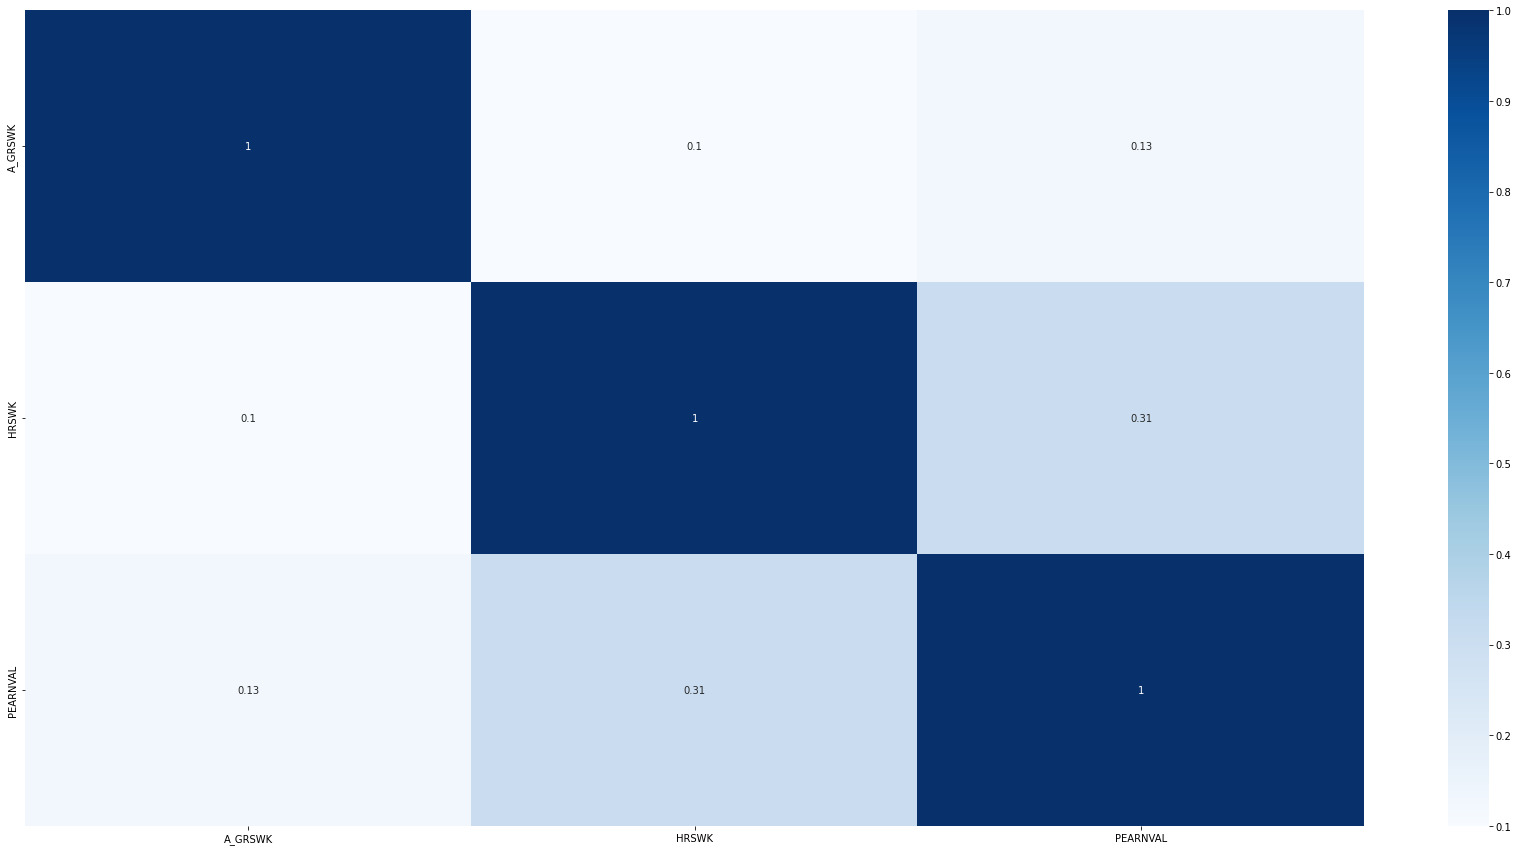

In [ ]:
# Correlation plot
correlation_df = asec_oes_final.filter(items=['A_GRSWK', 'HRSWK', 'PEARNVAL'], axis=1)

plt.figure(figsize=(30,15))
correlation_matrix = correlation_df.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True, cmap='Blues')

In [ ]:
# Numerically looking at the correlations
corrs = correlation_df.corr().round(2).unstack().abs()
corrs = corrs[corrs < 1]
corrs.sort_values(ascending = False)

PEARNVAL  HRSWK       0.31
HRSWK     PEARNVAL    0.31
PEARNVAL  A_GRSWK     0.13
A_GRSWK   PEARNVAL    0.13
HRSWK     A_GRSWK     0.10
A_GRSWK   HRSWK       0.10
dtype: float64

None of these predictors appear to be highly correlated.

###Boxplots
We use boxplots to visualize the categorical variabe of occupational code against several continuous variables, including weekly earnings, total person's earnings, and weekly hours.

Text(0.5, 1.0, 'Weekly Hours Worked vs Coded Occupation')

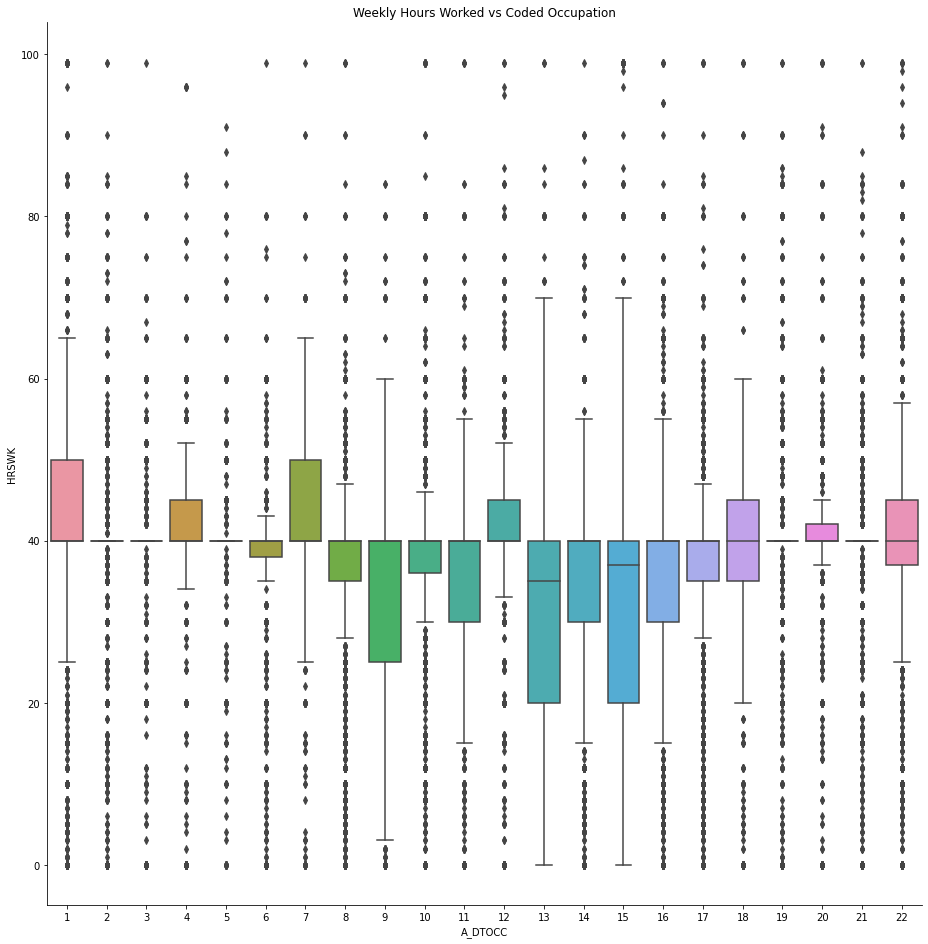

In [ ]:
sns.catplot(x="A_DTOCC", y="HRSWK", kind="box", data=asec_oes_final, height=13)
plt.title('Weekly Hours Worked vs Coded Occupation')

##Reflection
The data are not normally distributed, but do show some interesting trends between our variables of interest (sex, occupational group, race, hours worked, etc). Depending on the model implemented, we may need to return to EDA to explicitly check assumptions for the model.

# Data Processing / Models


##Pre-processing: Balancing Classes - Ellie
Because we're interested in predicting the occupation code of an individual based on their demographic data, it will be important to ensure all of our classes have equal representation in our training model. As it stands, our classes 1-22 range from a minimum of 871 observations (class 18) to a maximum of 10239 (class 1). To balance these classes, we'll randomly undersample all classes besides our minimum class. Depending on how well our model performs with the undersampled data, this method may need to be re-visited. 

In [ ]:
# Convert evenly sampled array to df
#rfc_df = pd.DataFrame(X_oversampled, columns=asec_oes_final.columns, dtype=float)
#rfc_df = pd.DataFrame(asec_oes_final)

# Separating data into training and testing sets
X = asec_oes_final.drop(['A_DTOCC', 'OCCUP', 'A_MJOCC', 'WEIND'], axis = 1).copy()
y = asec_oes_final['A_DTOCC']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=4)

In [ ]:
#undersampling using RandomUnderSampler

#Initialize random sampler
rus = RandomUnderSampler(random_state=0)

#Sampling
X_train_under, y_train_under = rus.fit_resample(X_train, y_train)
rfc_under_df = pd.DataFrame(X_train_under, columns=X_train.columns, dtype=float)
print(sorted(Counter(y_train_under).items()))

[(1, 871), (2, 871), (3, 871), (4, 871), (5, 871), (6, 871), (7, 871), (8, 871), (9, 871), (10, 871), (11, 871), (12, 871), (13, 871), (14, 871), (15, 871), (16, 871), (17, 871), (18, 871), (19, 871), (20, 871), (21, 871), (22, 871)]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
#over-sampling with RandomOverSampler
ros = RandomOverSampler()
X_train_over, y_train_over = ros.fit_resample(X_train, y_train)
rfc_over_df = pd.DataFrame(X_train_over, columns=X_train.columns, dtype=float)
print(sorted(Counter(y_train_over).items()))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[(1, 10239), (2, 10239), (3, 10239), (4, 10239), (5, 10239), (6, 10239), (7, 10239), (8, 10239), (9, 10239), (10, 10239), (11, 10239), (12, 10239), (13, 10239), (14, 10239), (15, 10239), (16, 10239), (17, 10239), (18, 10239), (19, 10239), (20, 10239), (21, 10239), (22, 10239)]


## Random Forest - Amy

In [ ]:
# Creating a model and cross validating over it multiple times to see how many forest will be best to use
num_trees = range(10,51,10)
cv_loops = 5
results = np.zeros(len(num_trees))
for n, trees in enumerate(num_trees):
  accuracy_cv = np.zeros(cv_loops)
  for i in range(cv_loops):
    X_train_over, X_test, y_train_over, y_test = train_test_split(X, y, test_size=0.20)

    rfModel = RandomForestClassifier(n_estimators=trees, random_state=0)
    rfModel.fit(rfc_over_df, y_train_over)
    y_pred_rf = rfModel.predict(X_test)

    predictions = [round(value) for value in y_pred_rf]
    accuracy = accuracy_score(predictions, y_test)
    accuracy_cv[i] = accuracy

  print(trees,' trees finished.')
  print(accuracy_cv.mean())

10  trees finished.
0.8592826067655155
20  trees finished.
0.8692843824913433
30  trees finished.
0.8747269821539554
40  trees finished.
0.8745849240877208
50  trees finished.
0.8779055313859541
60  trees finished.
0.877878895498535
70  trees finished.
0.8786247003462666
80  trees finished.
0.8794948060019532
90  trees finished.
0.8793438693065792


In [ ]:
# Re-running the RF model with the suggest number of trees
numLoops = 5

result = np.zeros(numLoops)

for idx in range(0,numLoops):
  X_train, X_test, y_train, y_test = train_test_split(rfc_X,rfc_y,test_size=0.2)
  model = RandomForestClassifier(n_estimators = 40, random_state=0) 
  model.fit(X_train,y_train)
  y_pred_rf = model.predict(X_test)

  predictions = [round(value) for value in y_pred_rf]
  accuracy = accuracy_score(y_test, predictions)
  accuracy_cv[i] = accuracy
print(accuracy_cv.mean())

0.46342924981627


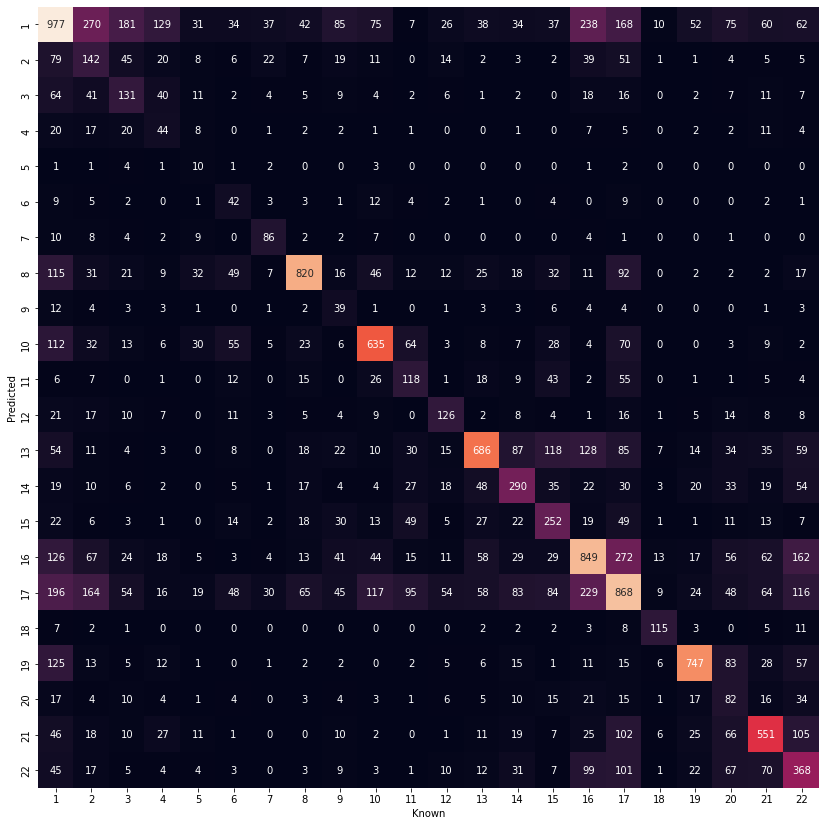

In [ ]:
#Confusion matrix for random forest results
plt.figure(figsize=(14,36))
mat = metrics.confusion_matrix(y_test,y_pred_rf)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=range(1,23), yticklabels=range(1,23))
plt.xlabel('Known')
plt.ylabel('Predicted');

In [ ]:
# Classification report for random forest results.
labels = list(map(str, range(1,23)))
classification_result = classification_report(y_test, y_pred_rf, target_names=labels)
print(classification_result)

              precision    recall  f1-score   support

           1       0.37      0.47      0.41      2083
           2       0.29      0.16      0.21       887
           3       0.34      0.24      0.28       556
           4       0.30      0.13      0.18       349
           5       0.38      0.05      0.10       182
           6       0.42      0.14      0.21       298
           7       0.63      0.41      0.50       209
           8       0.60      0.77      0.67      1065
           9       0.43      0.11      0.18       350
          10       0.57      0.62      0.59      1026
          11       0.36      0.28      0.31       428
          12       0.45      0.40      0.42       316
          13       0.48      0.68      0.56      1011
          14       0.43      0.43      0.43       673
          15       0.45      0.36      0.40       706
          16       0.44      0.49      0.46      1735
          17       0.35      0.43      0.38      2034
          18       0.71    

In [ ]:
# Visualization for the Random Forest
# display(graphviz.Source(tree.export_graphviz(rfModel.estimators_[0], feature_names=X.columns)))

In [ ]:
# importances = rfModel.feature_importances_
# forest_importances = pd.Series(importances, index=X_train.columns)

# plt.figure()
# forest_importances.plot.bar()
# plt.ylabel("Feature Importance Score")

## XG Boost - Ellie

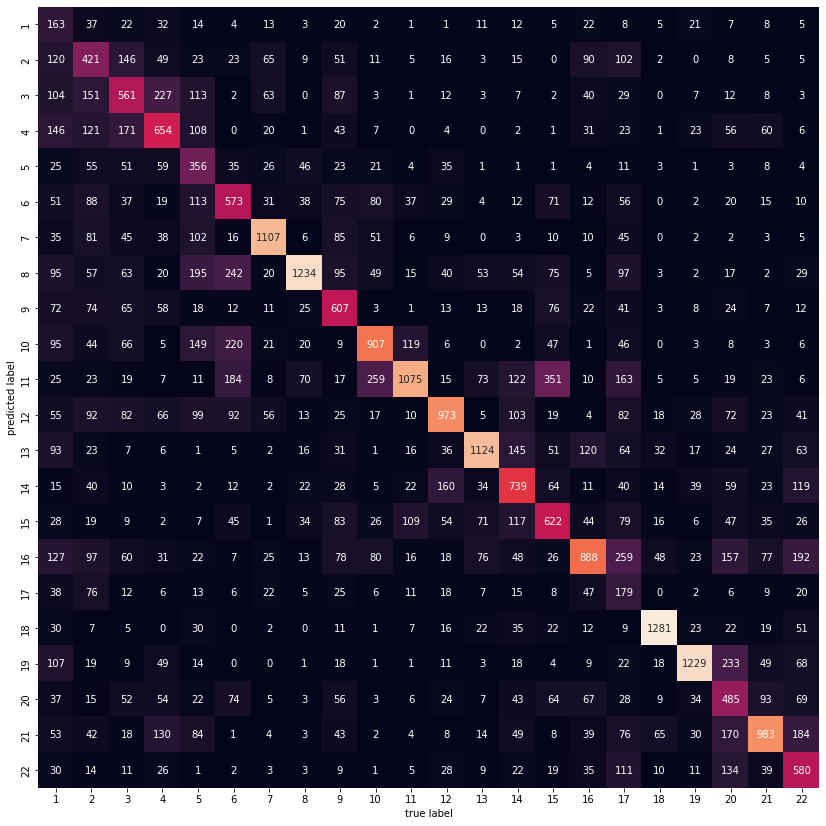

In [ ]:
#Convert evenly sampled array to df
xgb_df = pd.DataFrame(X_oversampled, columns=asec_oes_final.columns, dtype=float)

#Drop unneeded columns
xgb_df.drop(['OCCUP'], axis=1, inplace=True)

#Define data and target sets
X_xgb = xgb_df.copy()
Y_xgb = xgb_df['A_DTOCC']

#Drop target variable from dataset
X_xgb.drop(['A_DTOCC', 'A_MJOCC'], axis=1, inplace=True)

#Initialize model
numLoops = 1
mse_xgb  = np.zeros(numLoops)

for idx in range(0,numLoops):
  X_train_xgb, X_test_xgb, y_train_xgb, y_test_xgb = train_test_split(X_xgb,Y_xgb,test_size=0.15)
  xgbc = xgb.XGBClassifier(objective ='multi:softmax', verbosity=0, seed = 10)
  xgbc.fit(X_train_xgb,y_train_xgb)
  y_pred_xgb = xgbc.predict(X_test_xgb)

#Confusion matrix for XGB results
plt.figure(figsize=(14,36))
mat = metrics.confusion_matrix(y_test_xgb,y_pred_xgb)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=range(1,23), yticklabels=range(1,23))
plt.xlabel('true label')
plt.ylabel('predicted label');

In [ ]:
# Classification Report for XG Boost
labels = list(map(str, range(1,23)))
classification_result = classification_report(y_test_xgb, y_pred_xgb, target_names=labels)
print(classification_result)

              precision    recall  f1-score   support

           1       0.74      0.68      0.71      1560
           2       0.69      0.75      0.72      1506
           3       0.49      0.51      0.50      1544
           4       0.58      0.59      0.58      1456
           5       0.54      0.29      0.38      1529
           6       0.55      0.50      0.53      1552
           7       0.74      0.71      0.72      1535
           8       0.63      0.83      0.72      1575
           9       0.63      0.58      0.60      1543
          10       0.61      0.77      0.68      1539
          11       0.67      0.82      0.74      1514
          12       0.78      0.74      0.76      1483
          13       0.78      0.78      0.78      1499
          14       0.62      0.63      0.62      1539
          15       0.69      0.56      0.62      1612
          16       1.00      1.00      1.00      1511
          17       1.00      1.00      1.00      1505
          18       1.00    

In [ ]:
#NOTE: Not working, ran for 18 minutes then failed. Too large of a dataset?

#XGB testing parameters
param_test = {
 'max_depth':[3,4,5,6,7],
 'learning_rate' : [0.1, 0.2, 0.3, 0.4], 
 'n_estimators': [20,40,60,80,100,120,140],
}

# Perform the grid search
gsearch = GridSearchCV(estimator = xgb.XGBClassifier(objective = 'multi:softmax', seed = 10), 
 param_grid = param_test, scoring='accuracy', cv=5)

# Fit to training data 
X_train, X_test, y_train, y_test = train_test_split(X_xgb,Y_xgb,test_size=0.05)
model = gsearch.fit(X_train,y_train)

# See grid search results
print(model.best_params_)

KeyboardInterrupt: ignored

I'm wondering if one way to address the model's poor accuracy for some classes is to remove some of the advanced occupation codes. Perhaps we could try the model again after removing class 5 (Life, physical, and social science occupations)?

In [ ]:
#Determine feature importance

feat_imp = pd.Series(xgbc.feature_importances_, index=X_xgb.columns)
plt.figure(figsize = (10,6))
ax = sns.barplot(x = feat_imp.index, y = feat_imp.values)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
plt.xlabel('Feature')
plt.ylabel('Feature Importance Score')

Important features include 
- A_MJOCC : Major occupation recode (this seems like a type of duplicate of our target variable, A_DTCC? Not sure this should be included in our dataset)
- WEIND : index of longest job by detailed codes (this also seems like a duplicate, not sure this should be included)
- A_HGA : Education Attainment
- A_SEX : Sex
- HRCHECK : Employed full or part time

# Data Visualization and Results - MS-5 - Nov 19

## NOTES
data visualization (interactive - Interact, trends, maps - plotly, Dash by Plotly)

What questions do we want to answer with our visualizations?
- How have occupations changed over time? national and state level
- Which occupations require the most hours/week?
- What is the gender distribution over occupations?

Lectures to reference
- Module 1 - 5c - Matplotlib
- Module 3 - 2a - Interact
- Module 5 - 2b - Plotly_Express

Importing data for all years available

In [ ]:
# ELLIE - adding in state code
# Import FIPS state codes matching on USPS state codes
# Left Join - keep OES data even if no match on state code.
# oes_data = pd.merge(oes_data, fips_state_codes[['USPS_STATE','FIPS_STATE']], on='USPS_STATE', how='left')

# Join Family to get FINC columns
# asec_combined = pd.merge(asec_combined, asec_data_family_single[fseq_col + family_cols], left_on=hseq_col, right_on=fseq_col, how='left')

In [ ]:
#Import df with all years
df_viz = pd.read_csv(root_drive + 'Capstone/Data/FinalData/Trends/asec_trend_v1.csv')

# Drop rows where A_DTOCC = 0 = Not in universe or Armed Forces
df_viz.drop(np.where(df_viz['A_DTOCC'] == 0) [0], inplace=True)

#convert A_DTOCC codes to string descriptions
occ_dict = {1: 'Management',
            2: 'Business & Financial Operations',
            3: 'Computer & Mathematical Science',
            4: 'Architecture & Engineering',
            5: 'Life, Physical, & Social Science',
            6: 'Community & Social Service',
            7: 'Legal',
            8: 'Education, Training, & Library',
            9: 'Arts, Design, Entertainment, Sports, & Media',
            10: 'Healthcare Practitioner & Technical',
            11: 'Healtcare Support',
            12: 'Protective Service',
            13: 'Food Preparation & Serving Related',
            14: 'Building & Grounds Cleaning & Maintenance',
            15: 'Personal Care & Service',
            16: 'Sales & Related',
            17: 'Office & Administrative Support',
            18: 'Farming, Fishing, & Forestry',
            19: 'Construction & Extraction',
            20: 'Installation, Maintenance, & Repair',
            21: 'Production',
            22: 'Transportation & Material Moving',
            23: 'Armed Forces'}

#convert state codes to strings
state_dict = {1: 'AL',
              2: 'AK',
              4: 'AZ',
              5: 'AR',
              6: 'CA',
              8: 'CO',
              9: 'CT',
              10: 'DE',
              11: 'DC',
              12: 'FL',
              13: 'GA',
              15: 'HI',
              16: 'ID',
              17: 'IL',
              18: 'IN',
              19: 'IA',
              20: 'KA',
              21: 'KY',
              22: 'LA',
              23: 'ME',
              24: 'MD',
              25: 'MA',
              26: 'MI',
              27: 'MN',
              28: 'MS',
              29: 'MO',
              30: 'MT',
              31: 'NE',
              32: 'NV',
              33: 'NH',
              34: 'NJ',
              35: 'NM',
              36: 'NY',
              37: 'NC',
              38: 'ND',
              39: 'OH',
              40: 'OK',
              41: 'OR',
              42: 'PA',
              44: 'RI',
              45: 'SC',
              46: 'SD',
              47: 'TN',
              48: 'TX',
              49: 'UT',
              50: 'VT',
              51: 'VA',
              53: 'WA',
              54: 'WV',
              55: 'WI',
              56: 'WY',
              72: 'PR',
              78: 'VI',
              60: 'AS',
              66: 'GU',
              69: 'MP'}

df_viz.replace({'A_DTOCC': occ_dict}, inplace=True)
df_viz.replace({'GESTFIPS': state_dict}, inplace=True)

Nationally, what are the most popular occupation categories from years 2019 to 2021?

In [ ]:
@interact(year = [2019,2020,2021])
def pie(year=2019):
  'Makes pie plot with given year'
  df_viz_year = df_viz[df_viz['DATA_YEAR'] == year]
  keys = Counter(df_viz_year['A_DTOCC']).keys()
  list_keys= list(keys)
  list_keys.sort()
  fig = px.pie(df_viz_year, values=df_viz_year['A_DTOCC'].value_counts().sort_index(), names=list_keys, title=f'Occupations in the US by Year - {year}')
  return fig.show()

Add state as dropdown option

# Presentation and Conclusions - Final - Dec 3

